In [86]:
from src import hardspheres
from importlib import reload
reload(hardspheres)

<module 'src.hardspheres' from '/Users/ft14968/Repos/course-disordered-matter/quarto/soft-matter/src/hardspheres.py'>

In [102]:
tj, acceptance = hardspheres.hs_mc(0.45,5.0, nsteps=100000)
acceptance


0.33029

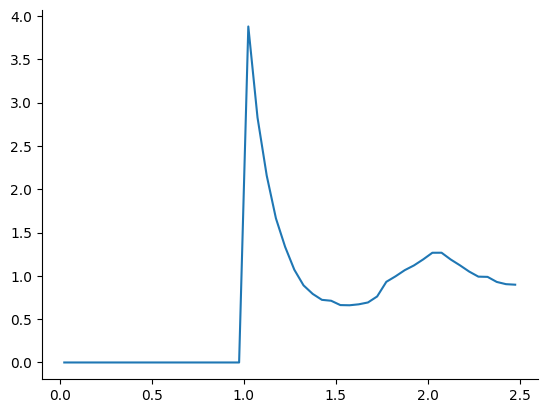

In [103]:
import numpy as np

bins = 50

def radial_distr(positions, L):
    N = len(positions)
    
    # Compute all pairwise distances with PBC
    diff = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]
    diff = diff - L * np.round(diff / L)
    dists_matrix = np.sqrt(np.sum(diff**2, axis=-1))
    
    # Get upper triangular distances (each pair counted once)
    i, j = np.triu_indices(N, k=1)
    dists = dists_matrix[i, j]
    
    # Create histogram
    r_max = L/2
    r_edges = np.linspace(0, r_max, bins+1)
    hist, _ = np.histogram(dists, bins=r_edges)
    r_centers = 0.5 * (r_edges[:-1] + r_edges[1:])
    
    # Calculate g(r) with correct normalization
    rho = N / L**3  # number density
    dr = r_edges[1:] - r_edges[:-1]  # bin widths
    
    # Volume of spherical shell
    shell_volumes = 4 * np.pi * r_centers**2 * dr
    
    # For each particle, expected number of neighbors in shell = rho * shell_volume
    # Total expected pairs in shell = N * rho * shell_volume / 2 
    # (divide by 2 because we count each pair once)
    expected_pairs = N * rho * shell_volumes / 2
    
    # g(r) = actual_pairs / expected_pairs
    g_r = hist / expected_pairs
    
    return r_centers, g_r

gs = []
for positions in tj[10:]:
    _r, _g = radial_distr(positions, 5.0)
    # plt.plot(_r,_g)
    gs.append(_g)

import matplotlib.pyplot as plt

plt.plot(_r, np.mean(gs, axis=0))

In [79]:
len(tj)

1000